<a href="https://colab.research.google.com/github/lmas3009/Machine-Learning-Udacity-Course/blob/main/Common_Patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plt_series (time,series,format='-' ,start=0,end=None,label=None):
  plt.plot(time[start:end],series[start:end],format,label=label)
  plt.xlabel('Time')
  plt.ylabel('Series')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

In [3]:
def trend(time,slope=0.1):
  return time*slope

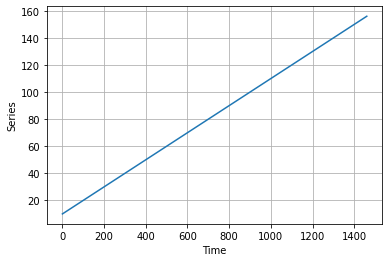

In [5]:
time = np.arange(4*365+1)
baseline=10
series = baseline+trend(time,0.1)
plt_series(time,series)
plt.show()

In [6]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [7]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

In [14]:
def seasonal_pattern (season_time):
  return np.where(season_time < 0.4, np.cos(season_time * 2 *np.pi),1 / np.exp(3 * season_time))

In [15]:
def seasonality(time,period,amplitude=1,phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

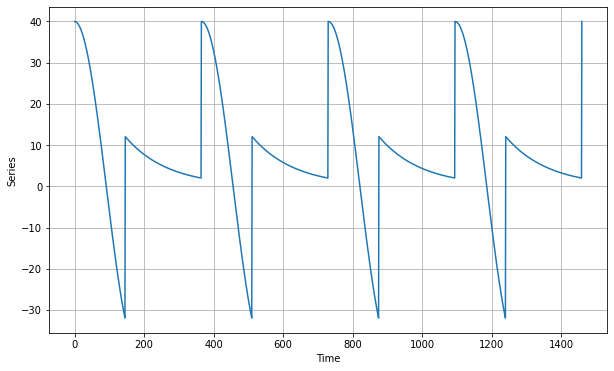

In [22]:
amplitude = 40
series = seasonality(time,period=365,amplitude=amplitude)

plt.figure(figsize=(10,6))
plt_series(time,series)
plt.show()

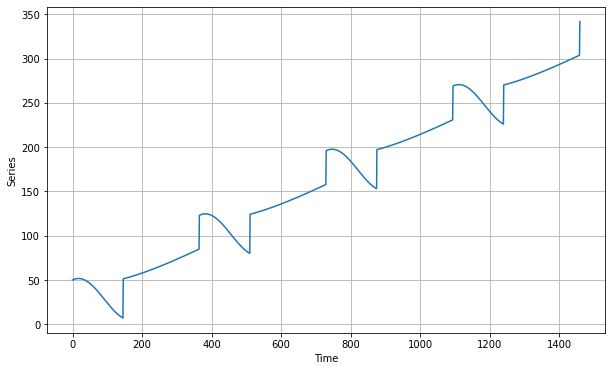

In [28]:
series = seasonality(time,period=365,amplitude=amplitude)+trend(time,0.2)+10

plt.figure(figsize=(10,6))
plt_series(time,series)
plt.show()

In [31]:
def white_noise(time,noise=1,seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.rand(len(time)) * noise

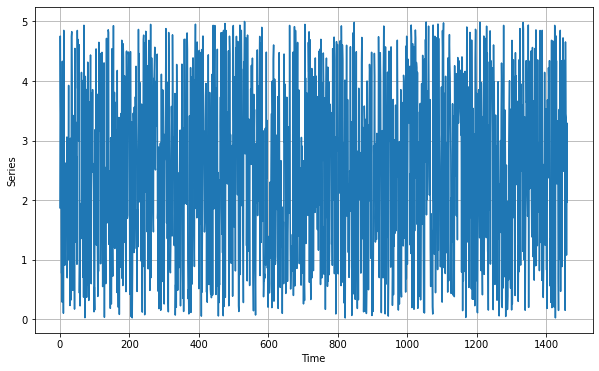

In [32]:
noise_level = 5
noise = white_noise(time,noise=noise_level,seed=42)

plt.figure(figsize=(10,6))
plt_series(time,noise)
plt.show()

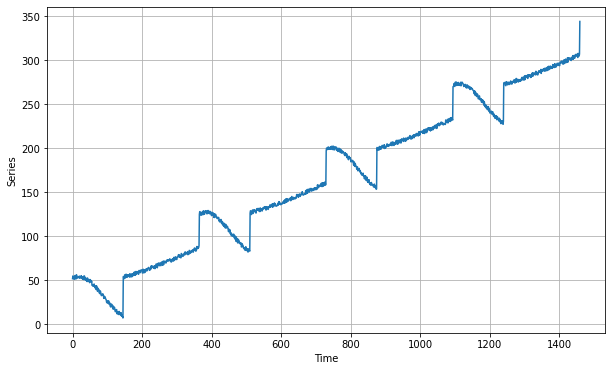

In [43]:
noise = white_noise(time,noise=noise_level,seed=42) + seasonality(time,period=365,amplitude=amplitude) + trend(time,0.2) +10

plt.figure(figsize=(10,6))
plt_series(time,noise)
plt.show()